# Deep Learning &mdash; Assignment 1

First assignment for the 2021 Deep Learning course (NWI-IMC058) of the Radboud University.

_Gijs van Tulder (g.vantulder@cs.ru.nl) and Twan van Laarhoven (tvanlaarhoven@cs.ru.nl)_

_September 2021_

-----

**Names:** Reza Shokrzad, Ilias Mourikis

**Group:** 50

-----

**Instructions:**
* Fill in your names and the name of your group.
* Answer the questions and complete the code where necessary.
* Re-run the whole notebook before you submit your work.
* Save the notebook as a PDF and submit that in Brightspace together with the `.ipynb` notebook file.

## Objectives

In this assignment you will
1. Experiment with gradient descent optimization;
2. Derive and implement gradients for binary cross-entropy loss, the sigmoid function and a linear layer;
3. Test your gradient implementations with the finite difference method;
4. Use these components to implement and train a simple neural network.

In [1]:
%matplotlib inline
import numpy as np
import scipy.optimize
import sklearn.datasets
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=6, linewidth=200)
plt.style.use('ggplot')

## 1.1 Gradient descent optimization

Consider the following function with two parameters and its derivatives:
\begin{align}
  f(x, y) &= x^2 + y^2 + x (y + 2) + \cos(3x) \\
  \frac{\partial f}{\partial x} &= 2x - 3\sin(3x) + y + 2 \\
  \frac{\partial f}{\partial y} &= x + 2y \\
\end{align}

In [2]:
def f(x, y):
    return x ** 2 + y ** 2 + x * (y + 2) + np.cos(3 * x)
def grad_x_f(x, y):
    return 2 * x - 3 * np.sin(3 * x) + y + 2
def grad_y_f(x, y):
    return x + 2 * y

A plot of the function shows that it has multiple local minima:

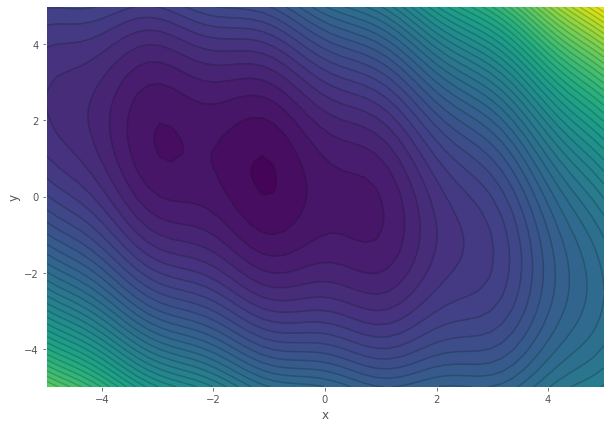

In [3]:
def plot_f_contours():
    xx, yy = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
    zz = f(xx, yy)
    # ax = plt.axes(projection='3d')
    # ax.contour3D(xx, yy, zz, 100, cmap='gray')
    plt.contourf(xx, yy, zz, 50)
    plt.contour(xx, yy, zz, 50, alpha=0.2, colors='black', linestyles='solid')
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(10, 7))
plot_f_contours()

### Implement gradient descent

We would like to find the minimum of this function using gradient descent.

**Implement the gradient descent updates for $x$ and $y$ in the function below:**

In [4]:
def optimize_f(x, y, step_size, steps):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]

    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at the current point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        # x = x  # TODO: compute the update
        # y = y  # TODO: compute the update
        x = x - step_size * dx
        y = y - step_size * dy
        
        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

### Tune the parameters

We will now try if our optimization method works.

Use this helper function to plot the results:

In [5]:
# helper function that plots the results of the gradient descent optimization
def plot_gradient_descent_results(x, y, val, x_hist, y_hist):
    # plot the path on the contour plot
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plot_f_contours()
    plt.plot(x_hist, y_hist, '.-')
    
    # plot the learning curve
    plt.subplot(1, 2, 2)
    plt.plot(f(np.array(x_hist), np.array(y_hist)), '.r-')
    plt.title('Minimum value: %f' % f(x_hist[-1], y_hist[-1]))

**Run the gradient descent optimization with the following initial settings:**

``x=3, y=2, step_size=0.1, steps=10``

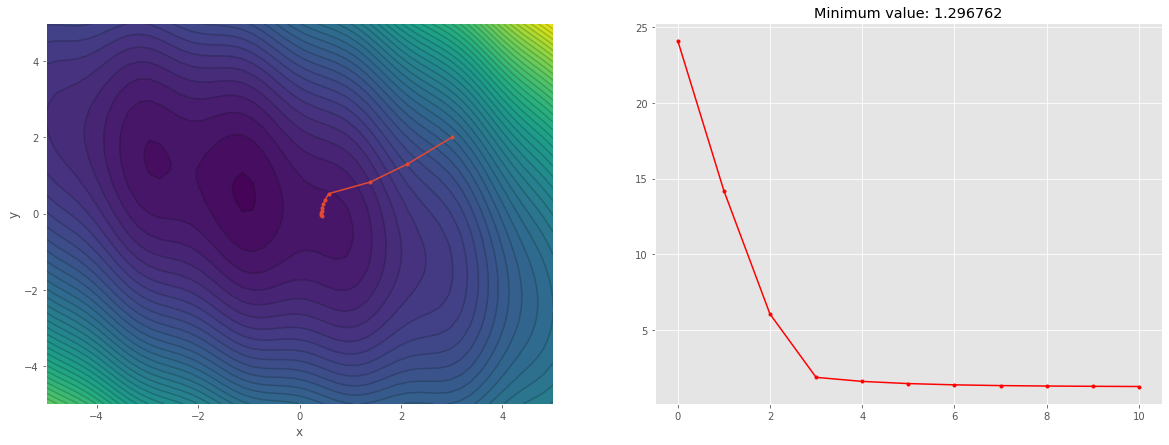

In [6]:
results = optimize_f(x=3, y=2, step_size=0.1, steps=10)
plot_gradient_descent_results(*results)

**Does it find the minimum of the function? What happens?**

TODO: Your answer here.

With this setup (params), we couldn’t access the global minimum because we have got stuck in a local optimum. As the function is nonconvex, there are also some local optimum points. Getting stuck in a local optimum is one of the most typical problems in applying the gradient descent method to find an optimum. It happens after choosing not appropriate step size and the number of steps. Additionally, it is understandable that starting point can impacts to finding the optimal. 

**Try a few different values for the `step_size` and the number of `steps` to get closes to the optimal solution:**

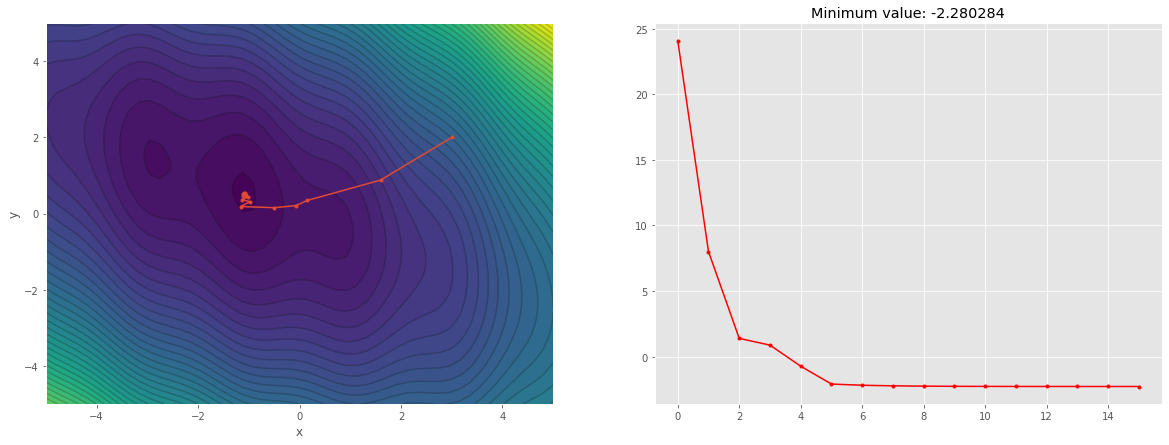

In [7]:
# TODO: tune the parameters to find a better optimum
results = optimize_f(x=3, y=2, step_size=0.16, steps=15)
plot_gradient_descent_results(*results)

**Were you able to find a step size that reached the global optimum? If not, why not?**

TODO: Your answer here.

Yes, we could find the global optimum through a simple grid search. We made a for loop to understand the effect of step-size. Then, We realized an appropriate step-size is 0.16, and after 15 steps, we can access a proper solution.

### Implement a decreasing step size

You might get better results if you use a step size that is large at the beginning, but slowly decreases during the optimization.

Try the following scheme to compute the step size $\eta_t$ in step $t$, given a decay parameter $d$:
\begin{align}
  \eta_t = \eta_0 d^t
\end{align}

**Update your optimization function to use this step size schedule:**

In [8]:
def optimize_f(x, y, step_size, steps, decay=1.0):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]

    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at this point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        # x = x  # TODO: compute the update including step size decay
        # y = y  # TODO: compute the update including step size decay
        x = x - step_size * (decay/np.log(step+1.5)) * dx
        y = y - step_size * (decay/np.log(step+1.5)) * dy

        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

**Tune the `step_sizes`, `steps` and `decay` parameters to get closer to the global minimum:**

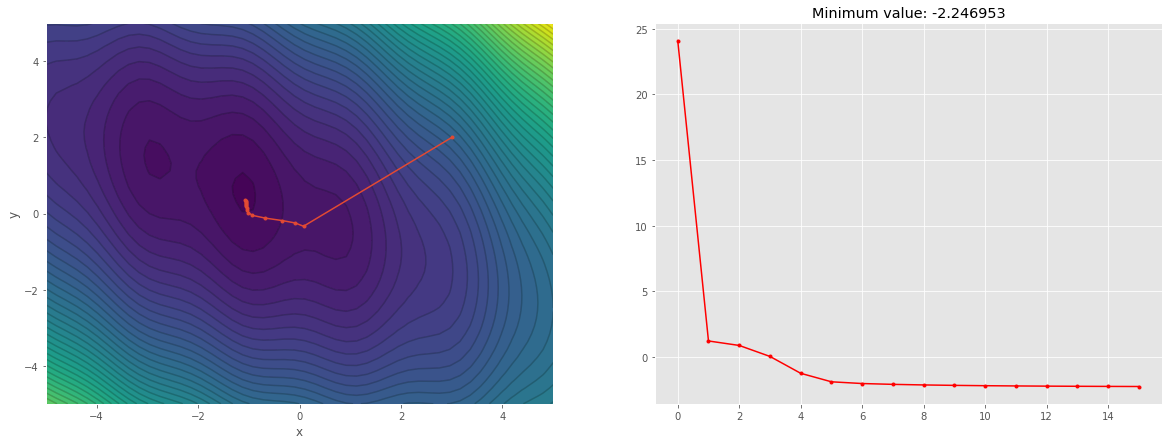

In [9]:
# TODO: tune the parameters to find the local optimum
results = optimize_f(x=3, y=2, step_size=0.16, steps=15, decay=0.845)
plot_gradient_descent_results(*results)

We will now look at some more complex functions that we can try to optimize.

## 1.2 Neural network components

In this assignment, we will implement a simple neural network from scratch. We need four components:
1. A sigmoid activation function,
2. A ReLU activation function,
3. A binary cross-entropy loss function,
4. A linear layer.

For each component, we will implement the forward pass, the backward pass, and the gradient descent update.

### Sigmoid non-linearity

The sigmoid function is defined as:

\begin{align}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
\end{align}

![Sigmoid](attachment:sigmoid.png)

**Give the derivative of the sigmoid function:**

TODO: Your answer here:

\begin{align}
\frac{\partial \sigma(x)}{\partial x} &= \frac{ e^{-x}}{(1 + e^{-x}) ^ 2} \\
\end{align}


**Implement the sigmoid and its gradient in the functions `sigmoid(x)` and `sigmoid_grad(x)`:**

In [10]:
def sigmoid(x):
    # TODO: implement the sigmoid function
    # raise NotImplementedError
    return (1 / (1 + np.exp(-x)))

def sigmoid_grad(x):
    # TODO: implement the gradient of the sigmoid function
    # raise NotImplementedError
    return (np.exp(-x) / ((1 + np.exp(-x)) ** 2))
    
# try with a random input
x = np.random.uniform(-10, 10, size=5)
print('x:', x)
print('sigmoid(x):', sigmoid(x))
print('sigmoid_grad(x):', sigmoid_grad(x))

x: [ 6.038501  3.600514 -4.065987  1.146336  2.351954]
sigmoid(x): [0.997621 0.973416 0.016857 0.758841 0.913089]
sigmoid_grad(x): [0.002374 0.025877 0.016573 0.183001 0.079357]


To check that the gradient implementation is correct, we can compute the numerical derivative using the [finite difference](https://en.wikipedia.org/wiki/Finite_difference) method. From [Chapter 11.5 of the Deep Learning book](http://www.deeplearningbook.org/contents/guidelines.html):

> Because
  \begin{align}
    f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x + \epsilon) - f(x)}{ \epsilon},
  \end{align}
  we can approximate the derivative by using a small, finite $\epsilon$:
  \begin{align}
    f'(x) \approx \frac{f(x + \epsilon) - f(x)}{\epsilon}.
  \end{align}
  We can improve the accuracy of the approximation by using the centered difference:
  \begin{align}
    f'(x) \approx \frac{f(x + \frac{1}{2} \epsilon) - f(x - \frac{1}{2} \epsilon)}{\epsilon}.
  \end{align}
  The perturbation size $\epsilon$ must be large enough to ensure that the perturbation is not rounded down too much by ﬁnite-precision numerical computations.

**Use the central difference method to check your implementation of the sigmoid gradient. Compute the numerical gradient and check that it is close to the symbolic gradient computed by your implementation:**

In [11]:
# start with some random inputs
x = np.random.uniform(-2, 2, size=5)

# compute the symbolic gradient
print('Symbolic', sigmoid_grad(x))

# TODO: compute the numerical gradient
def num_grad_sigmoid_v1(x, e=0.1):
  return ((sigmoid(x+e) - sigmoid(x)) / e)

def num_grad_sigmoid_v2(x, e=0.1):
  return ((sigmoid(x+e/2) - sigmoid(x-e/2)) / e)

print('numerical1', num_grad_sigmoid_v1(x, 0.1))
print('numerical2', num_grad_sigmoid_v2(x, 0.1))

Symbolic [0.187318 0.215617 0.24996  0.249569 0.241091]
numerical1 [0.191965 0.219505 0.249595 0.248844 0.243184]
numerical2 [0.187309 0.215591 0.249908 0.249517 0.241046]


**Is the gradient computed with finite differences exactly the same as the analytic answer? Why (not)?**

TODO: Your answer here.

They don’t result in just the same in floating points, but they operate so similar to each other. Generally, there is a negligible difference in the output of numerical methods and analytical ones. Based on the outputs, the second numerical formula is working more accurately. Besides, we tunned the value of epsilon that 0.1 has led to better result.

**If there is a visible difference between the two gradients, please try to make this as small as possible before you continue.**

## Rectified linear units (ReLU)

The rectified linear unit is defined as:
\begin{align}
  f(x) = \max(0, x)
\end{align}

![relu.png](attachment:relu.png)

**Give the derivative of the ReLU function:**

TODO: Your answer here.

\begin{align}
  \frac{\partial f(x)}{\partial x} &= \begin{cases}
             0  & \text{if } x < 0 \\
             1  & \text{if } x > 0
       \end{cases} \quad
\end{align}


**Implement the ReLU function and its gradient in the functions `relu(x)` and `relu_grad(x)`. Use the finite difference method to check that the gradient is correct:**

In [12]:
def relu(x):
    # TODO: implement the relu function
    return (x>0) * x

def relu_grad(x):
    # TODO: implement the gradient of the relu function
    return np.array(x>0).astype(np.float32)

# try with a random input
x = np.random.uniform(-10, 10, size=5)
print('x:', x)
print('relu(x):', relu(x))
print('relu_grad(x):', relu_grad(x))
print()

# TODO: compute and compare the symbolic and numerical gradients


x: [-8.352663 -3.963367  0.516481  9.292738  4.346694]
relu(x): [-0.       -0.        0.516481  9.292738  4.346694]
relu_grad(x): [0. 0. 1. 1. 1.]



### Comparing sigmoid and ReLU

The sigmoid and ReLU activation functions have slightly different characteristics.

**Run the code below to plot the sigmoid and ReLU activation functions and their gradients:**

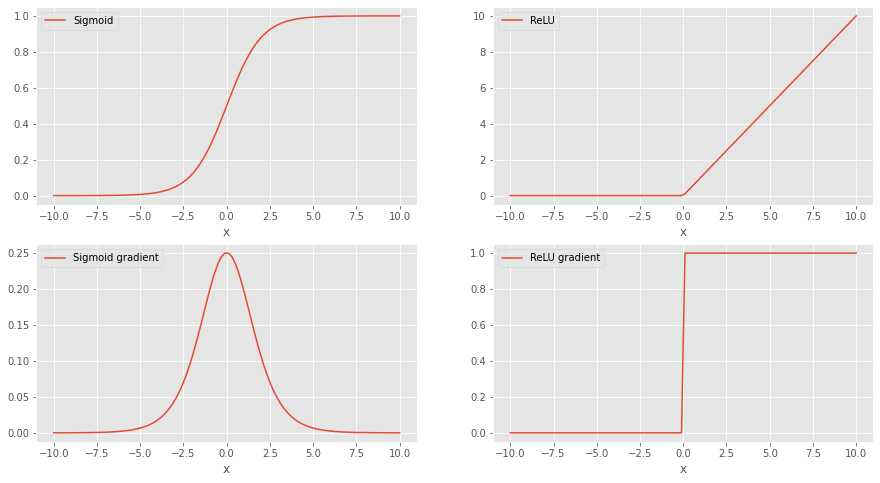

In [13]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(x, relu(x), label='ReLU')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(x, sigmoid_grad(x), label='Sigmoid gradient')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(x, relu_grad(x), label='ReLU gradient')
plt.xlabel('x')
plt.legend(loc='upper left');

**Which activation function would you recommend for a network that outputs probabilities, i.e., outputs $\in (0, 1)$? Why?**

TODO: Your answer here.

Since the sigmoid output is in range (0,1), it would be a better option for last layer’s activation function to represent a probabilty. 

**Compare the gradients for sigmoid and ReLU. What are the advantages and disadvantages of each activation function?**

TODO: Your answer here.

If the absolute value of sigmoid input is large, sigmoid saturates and the derivation is almost zero in this saturated area. Hence, the derivation (in the chain rule) will not help to rescue for going back to the central area which the derivation has non-zero value. This problem doesn’t occur in ReLU.

Efficiency: Because its derivative is simpler, ReLU is so faster than sigmoid in computing.

Simplicity: ReLU is simpler than sigmoid

Robustness: in terms of vanishing gradient, ReLU behaves more robustly. Since its derivative is either 0 or 1, multiplying by it in the chain rule won't cause weights that are further away from the end result of the loss function, to suffer from the vanishing gradient problem.


### Binary cross-entropy loss

We will use the binary cross-entropy loss to train our network. This loss function is useful for binary classification.

The binary cross-entropy (BCE) is a function of the ground truth label $y \in \{0, 1\}$ and the predicted label $\hat{y} \in (0, 1)$:

\begin{align}
  \mathcal{L} &= -(y \log{\hat{y}} + (1-y) \log(1-\hat{y})) \\
\end{align}

To minimize the BCE loss with gradient descent, we need to compute the gradient with respect to the prediction $\hat{y}$.

**Derive the gradient for the BCE loss:**

TODO: Your answer here.

\begin{align}
\frac{\partial \mathcal{L}}{\partial \hat{y}} &= -(\dfrac{y}{\hat{y}} - \dfrac{1-y}{1-\hat{y}}) = \dfrac{\hat{y} - y}{\hat{y}(1-\hat{y})}
\end{align}


**Implement `bce_loss(y, y_hat)` and `bce_loss_grad(y, y_hat)` and use the finite difference method to check that the gradient is correct:**

In [14]:
def bce_loss(y, y_hat):
    # TODO: implement the BCE loss
    #  raise NotImplementedError
    # y_hat = np.array(y_hat)
    # idx = np.where(y_hat<0)
    # y_hat[idx] = 0.01

    # idx = np.where(1-y_hat<0)
    # y_hat[idx] = 0.99
    
    return (-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def bce_loss_grad(y, y_hat):
    # TODO: implement the gradient of the BCE loss
    # raise NotImplementedError
    return ((y_hat - y) / ((1 - y_hat) * y_hat))
# try with some random inputs
y = np.random.randint(2, size=5)
y_hat = np.random.uniform(0, 1, size=5)
print('y:', y)
print('y_hat:', y_hat)
print('bceloss(y, y_hat):', bce_loss(y, y_hat))
print('bcelossGradient(y, y_hat):', bce_loss_grad(y, y_hat))
print()

# TODO: compute and compare the symbolic and numerical gradients
def num_grad_bce(y, y_hat, e=0.1):
  return ((bce_loss(y, y_hat + 1/2 * e) - bce_loss(y, y_hat - 1/2 * e)) / e)

print('Numerical gradient of bce', num_grad_bce(y, y_hat))

y: [1 0 1 0 0]
y_hat: [0.656314 0.567744 0.292448 0.391065 0.426363]
bceloss(y, y_hat): [0.421116 0.838738 1.229467 0.496044 0.555759]
bcelossGradient(y, y_hat): [-1.523661  2.313446 -3.419407  1.642212  1.743263]

Numerical gradient of bce [-1.526619  2.323847 -3.453321  1.645918  1.747698]


### Linear layer

Finally, we need to compute the gradients for the linear layer in our network.

Define a linear model $\mathbf{y} = \mathbf{x} \mathbf{W} + \mathbf{b}$, where
* $\mathbf{x}$ is an input vector of shape $N$,
* $\mathbf{W}$ is a weight matrix of shape $N \times M$,
* $\mathbf{b}$ is a bias vector of shape $M$,
* $\mathbf{y}$ is the output vector of shape $M$.

**Derive the gradients for $\mathbf{y}$ with respect to the input $\mathbf{x}$ and the parameters $\mathbf{W}$ and $\mathbf{b}$:**

_Hint: If you have trouble computing this in matrix notation directly, try to do the computation with scalars first._

TODO: Your answer here.

\begin{align}
  \nabla_\mathbf{x} \mathbf{y} &= \mathbf{W}\\
  \nabla_\mathbf{W} \mathbf{y} &= \mathbf{x}\\
  \nabla_\mathbf{b} \mathbf{y} &= \mathbf{1}\\
\end{align}


**Given the gradient $\nabla_\mathbf{y} \mathcal{L}$ for the loss w.r.t. $\mathbf{y}$, use the chain rule to derive the gradients for the loss w.r.t. $\mathbf{x}$, $\mathbf{W}$ and $\mathbf{b}$:**

TODO: Your answer here.

\begin{align}
  \nabla_\mathbf{x} \mathcal{L} &= \nabla_\mathbf{y} \mathbf{L} \times \nabla_\mathbf{x} \mathbf{y} = \log(\frac{1 - \hat{y}}{\hat{y}}) * \mathbf{W}\\
  \nabla_\mathbf{W} \mathcal{L} &= \nabla_\mathbf{y} \mathbf{L} \times \nabla_\mathbf{W} \mathbf{y} = \log(\frac{1 - \hat{y}}{\hat{y}}) * \mathbf{x}\\
  \nabla_\mathbf{b} \mathcal{L} &= \nabla_\mathbf{y} \mathbf{L} \times \nabla_\mathbf{b} \mathbf{y} = \log(\frac{1 - \hat{y}}{\hat{y}})\\
\end{align}


## 1.3 Implement a one-layer model

We can now implement a simple one-layer model with a sigmoid activation:

1. Given an input vector $\mathbf{x}$, weight vector $\mathbf{w}$ and bias $b$, compute the output $\hat{y}$:

\begin{align}
h = \mathbf{x}^T \mathbf{w} + b \\
\hat{y} = \sigma(h) \\
\end{align}

2. Compute the BCE loss comparing the prediction $\hat{y}$ with the ground-truth label $y$.

3. Compute the gradient for the BCE loss and back-propagate this to get $\nabla_\mathbf{x} \mathcal{L}$, the gradient of $\mathcal{L}$ w.r.t. $\mathbf{x}$.

**Complete the implementation below:**

In [15]:
# initialize parameters
w = np.random.uniform(size=5)
b = np.random.rand()

# implement the model
def fn(x, y):
    # TODO: forward: compute h, y_hat, loss
    h = np.matmul(x.T, w) + b
    # print(h)
    y_hat = sigmoid(h)
    # print(y_hat)
    # print(y)
    loss = bce_loss(y, y_hat)
    # print(loss)

    # TODO: backward: compute grad_y_hat, grad_h, grad_x
    grad_y_hat = bce_loss_grad(y, y_hat)
    grad_h = sigmoid_grad(h)
    grad_x = grad_y_hat * grad_h * w

    return loss, grad_x

# test with a random input
x = np.random.uniform(size=5)
y = 1.0

loss, grad_x = fn(x, y)
print("Loss", loss)
print("Gradient", grad_x)

Loss 0.21118893987451703
Gradient [-0.039483 -0.074176 -0.056031 -0.080501 -0.093761]


**Use the finite-difference method to check the gradient $\nabla_\mathbf{x} \mathcal{L}$:**

In [16]:
# start with some random inputs
x = np.random.uniform(size=5)
y = 1

# set epsilon to a small value
eps = 0.00001

numerical_grad = np.zeros(x.shape)
# compute the gradient for each element of x separately
for i in range(len(x)):
    # compute inputs at -eps/2 and +eps/2
    x_a, x_b = x.copy(), x.copy()
    x_a[i] += eps / 2
    x_b[i] -= eps / 2

    # compute the gradient for this element
    loss_a, _ = fn(x_a, y)
    loss_b, _ = fn(x_b, y)
    numerical_grad[i] = (loss_a - loss_b) / eps

# compute the symbolic gradient
loss, symbolic_grad = fn(x, y)
    
print("Symbolic gradient")
print(symbolic_grad)
print("Numerical gradient")
print(numerical_grad)

Symbolic gradient
[-0.034512 -0.064837 -0.048977 -0.070367 -0.081957]
Numerical gradient
[-0.034512 -0.064837 -0.048977 -0.070367 -0.081957]


## 1.4 Implement a linear layer and the sigmoid and ReLU activation functions

We will now construct a simple neural network. We need to implement the folowing objects:
* `Linear`: a layer that computes `y = x*W + b`.
* `Sigmoid`: a layer that computes `y = sigmoid(x)`.
* `ReLU`: a layer that computes `y = relu(x)`.

For each layer class, we need to implement the following methods:
* `forward`: The forward pass that computes the output `y` given `x`.
* `backward`: The backward pass that receives the gradient for `y` and computes the gradients for the input `x` and the parameters of the layer.
* `step`: The update step that applies the gradient updates to the parameters of the layer, based on the gradient computed and stored by `backward`.

**Implement a class `Linear` that computes `y = x*W + b`:**

In [17]:
# Computes y = x * w + b.
class Linear:
    def __init__(self, n_in, n_out):
        # initialize the weights randomly,
        # using the Xavier initialization rule for scale
        a = np.sqrt(6 / (n_in * n_out))
        self.W = np.random.uniform(-a, a, size=(n_in, n_out))
        self.b = np.zeros((n_out,))

    def forward(self, x):
        # TODO: compute the forward pass
        y = np.matmul(x, self.W) + self.b  # TODO
        return y

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # given dy, compute the gradients for x, W and b
        dx = np.matmul(self.W, dy.T).T  # TODO
        self.dW = np.matmul(x.T, dy)  # TODO
        self.db = np.sum(dy, axis=0)  # TODO
        return dx
    
    def step(self, step_size):
        # TODO: apply a gradient descent update step
        self.W = self.W - step_size * self.dW # TODO
        self.b = self.b - step_size * self.db # TODO
        
    def __str__(self):
        return 'Linear %dx%d' % self.W.shape


# Try the new class with some random values.
# Debugging tip: always choose a unique length for each
# dimension, so you'll get an error if you mix them up.
x = np.random.uniform(size=(3, 5))

layer = Linear(5, 7)
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[-0.099435 -0.307881  0.16995   0.202407 -0.110406  0.132455 -0.199505]
 [-0.021288 -0.161524  0.102394  0.180867  0.122012  0.029972 -0.11317 ]
 [-0.238736 -0.337894  0.30942   0.477101 -0.199791  0.288692 -0.328261]]
dx: [[-0.522059  0.774601 -0.103942  0.193911 -0.45784 ]
 [-0.522059  0.774601 -0.103942  0.193911 -0.45784 ]
 [-0.522059  0.774601 -0.103942  0.193911 -0.45784 ]]


**Implement a class `Sigmoid` that computes `y = 1 / (1 + exp(-x))`:**

In [18]:
# Computes y = 1 / (1 + exp(-x)).
class Sigmoid:
    def forward(self, x):
        # TODO: compute the forward pass
        # raise NotImplementedError  # TODO
        return sigmoid(x)

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # return the gradient for x given dy
        # raise NotImplementedError  # TODO
        return sigmoid_grad(x) * dy

    def step(self, step_size):
        # raise NotImplementedError  # TODO
        pass
        
    def __str__(self):
        return 'Sigmoid'


# try the new class with some random values
x = np.random.uniform(size=(3, 5))

layer = Sigmoid()
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[0.588516 0.686462 0.533417 0.69305  0.648772]
 [0.647249 0.602869 0.507593 0.709926 0.60324 ]
 [0.730883 0.568743 0.686366 0.602357 0.54458 ]]
dx: [[0.242165 0.215232 0.248883 0.212732 0.227867]
 [0.228318 0.239418 0.249942 0.205931 0.239342]
 [0.196693 0.245274 0.215268 0.239523 0.248013]]


**Implement a class `ReLU` that computes `y = max(0, x)`:**

In [19]:
# Computes y = max(0, x).
class ReLU:
    def forward(self, x):
        # TODO: compute the forward pass
        # raise NotImplementedError  # TODO
        return relu(x)

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # return the gradient for x given dy
        # raise NotImplementedError  # TODO
        return relu_grad(x) * dy
    
    def step(self, step_size):
        # raise NotImplementedError  # TODO
        pass
    def __str__(self):
        return 'ReLU'


# try the new class with some random values
x = np.random.uniform(-10, 10, size=(3, 5))

layer = ReLU()
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[-0.       -0.        4.875329 -0.        1.627123]
 [-0.        2.555756 -0.       -0.       -0.      ]
 [ 9.432169 -0.        7.719728 -0.        7.31698 ]]
dx: [[0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]]


### Verify the gradients (using provided code)

The code below will check your implementations using SciPy's finite difference implementation [`check_grad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.check_grad.html). This is similar to what we did manually before, but automates some of the work.

**Run the code and check that the error is not too large.**

In [20]:
## Verify gradient computations for Linear
# test for dx
layer = Linear(5, 7)
def test_fn(x):
    x = x.reshape(3, 5)
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))

def test_fn_grad(x):
    x = x.reshape(3, 5)
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones((3, 7))).flatten()

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=3 * 5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

# test for dW
x = np.random.uniform(size=(3, 5))
layer = Linear(5, 7)
def test_fn(w):
    layer.W = w.reshape(5, 7)
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))

def test_fn_grad(w):
    layer.W = w.reshape(5, 7)
    # multiply the incoming dy gradient with a constant
    layer.backward(x, 2 * np.ones((3, 7)))
    return layer.dW.flatten()

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=5 * 7))
print("err on dW:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

# test for db
x = np.random.uniform(size=(3, 5,))
layer = Linear(5, 7)
def test_fn(b):
    layer.b = b
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
    
def test_fn_grad(b):
    layer.b = b
    # multiply the incoming dy gradient with a constant
    layer.backward(x, 2 * np.ones((x.shape[0], 7)))
    return layer.db

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=7))
print("err on db:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 1.4925264015832561e-06
err on dW: OK 4.405399158956602e-06
err on db: OK 0.0


In [21]:
## Verify gradient computation for Sigmoid
# test for dx
layer = Sigmoid()
def test_fn(x):
    # multiply the output with a constant to check if
    # the gradient uses dy
    return np.sum(2 * layer.forward(x))
def test_fn_grad(x):
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones(x.shape))

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 3.7329301121736154e-08


In [22]:
## Verify gradient computation for ReLU
# test for dx
layer = ReLU()
def test_fn(x):
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
def test_fn_grad(x):
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones(x.shape))

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(1, 10, size=5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 0.0


## 1.5 Construct a neural network with back-propagation

We will use the following container class to implement the network:
1. The `forward` pass computes the output of each layer. We store the intermediate inputs for the backward pass.
2. The `backward` pass computes the gradients for each layer, in reverse order, by using the original input `x` and the gradient `dy` from the previous layer.
3. The `step` function will ask each layer to apply the gradient descent updates to its weights.

**Read the code below:**

In [23]:
class Net:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        # compute the forward pass for each layer
        trace = []
        for layer in self.layers:
            # compute the forward pass
            y = layer.forward(x)
            # store the original input for the backward pass
            trace.append((layer, x))
            x = y
        # return the final output and the history trace
        return y, trace

    def backward(self, trace, dy):
        # compute the backward pass for each layer
        for layer, x in trace[::-1]:
            # compute the backward pass using the original input x
            dy = layer.backward(x, dy)

    def step(self, learning_rate):
        # apply the gradient descent updates of each layer
        for layer in self.layers:
            layer.step(learning_rate)

    def __str__(self):
        return '\n'.join(str(l) for l in self.layers)

## 1.6 Training the network

We load a simple dataset with 360 handwritten digits.

Each sample has $8 \times 8$ pixels, arranged as a 1D vector of 64 features.

We create a binary classification problem with the label 0 for the digits 0 to 4, and 1 for the digits 5 to 9.

digits_x.shape: (1797, 64)
digits_y.shape: (1797,)
min, max values: -0.8117561971974786 1.847470154168513
labels: [0. 1.]


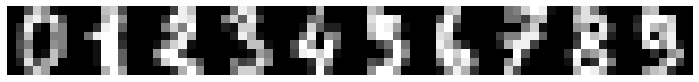

In [24]:
# load the first two classes of the digits dataset
dataset = sklearn.datasets.load_digits()
digits_x, digits_y = dataset['data'], dataset['target']

# create a binary classification problem
digits_y = (digits_y < 5).astype(float)

# plot some of the digits
plt.figure(figsize=(10, 2))
plt.imshow(np.hstack([digits_x[i].reshape(8, 8) for i in range(10)]), cmap='gray')
plt.grid(False)
plt.tight_layout()
plt.axis('off')

# normalize the values to [0, 1]
digits_x -= np.mean(digits_x)
digits_x /= np.std(digits_x)

# print some statistics
print('digits_x.shape:', digits_x.shape)
print('digits_y.shape:', digits_y.shape)
print('min, max values:', np.min(digits_x), np.max(digits_x))
print('labels:', np.unique(digits_y))

We divide the dataset in a train and a test set.

In [25]:
# make a 50%/50% train/test split
train_prop = 0.5
n_train = int(digits_x.shape[0] * train_prop)

# shuffle the images
idxs = np.random.permutation(digits_x.shape[0])

# take a subset
x = {'train': digits_x[idxs[:n_train]],
     'test':  digits_x[idxs[n_train:]]}
y = {'train': digits_y[idxs[:n_train]],
     'test':  digits_y[idxs[n_train:]]}

print('Training samples:', x['train'].shape[0])
print('Test samples:', x['test'].shape[0])

Training samples: 898
Test samples: 899


We will now implement a function that trains the network. For each epoch, it loops over all minibatches in the training set and updates the network weights. It will then compute the loss and accuracy for the test samples. Finally, it will plot the learning curves.

**Read through the code below.**

In [26]:
def fit(net, x, y, epochs=25, learning_rate=0.001, mb_size=10):
    # initialize the loss and accuracy history
    loss_hist = {'train': [], 'test': []}
    accuracy_hist = {'train': [], 'test': []}

    for epoch in range(epochs):
        # initialize the loss and accuracy for this epoch
        loss = {'train': 0.0, 'test': 0.0}
        accuracy = {'train': 0.0, 'test': 0.0}

        # first train on training data, then evaluate on the test data
        for phase in ('train', 'test'):
            # compute the number of minibatches
            steps = x[phase].shape[0] // mb_size

            # loop over all minibatches
            for step in range(steps):
                # get the samples for the current minibatch
                x_mb = x[phase][(step * mb_size):((step + 1) * mb_size)]
                y_mb = y[phase][(step * mb_size):((step + 1) * mb_size), None]

                # compute the forward pass through the network
                pred_y, trace = net.forward(x_mb)

                # compute the current loss and accuracy
                loss[phase] += np.mean(bce_loss(y_mb, pred_y))
                accuracy[phase] += np.mean((y_mb > 0.5) == (pred_y > 0.5))

                # only update the network in the training phase
                if phase == 'train':
                    # compute the gradient for the loss
                    dy = bce_loss_grad(y_mb, pred_y)

                    # backpropagate the gradient through the network
                    net.backward(trace, dy)

                    # update the weights
                    net.step(learning_rate)

            # compute the mean loss and accuracy over all minibatches
            loss[phase] = loss[phase] / steps
            accuracy[phase] = accuracy[phase] / steps

            # add statistics to history
            loss_hist[phase].append(loss[phase])
            accuracy_hist[phase].append(accuracy[phase])

        print('Epoch %3d: loss[train]=%7.4f  accuracy[train]=%7.4f  loss[test]=%7.4f  accuracy[test]=%7.4f' %
              (epoch, loss['train'], accuracy['train'], loss['test'], accuracy['test']))

    # plot the learning curves
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    for phase in loss_hist:
        plt.plot(loss_hist[phase], label=phase)
    plt.title('BCE loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for phase in accuracy_hist:
        plt.plot(accuracy_hist[phase], label=phase)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

We will define a two-layer network:
* A linear layer that maps the 64 features of the input to 32 features.
* A ReLU activation function.
* A linear layer that maps the 32 features to the 1 output features.
* A sigmoid activation function that maps the output to [0, 1].

**Train the network and inspect the results. Tune the hyperparameters to get a good result.**

Epoch   0: loss[train]= 0.5025  accuracy[train]= 0.7522  loss[test]= 0.3014  accuracy[test]= 0.9051
Epoch   1: loss[train]= 0.2476  accuracy[train]= 0.9129  loss[test]= 0.1962  accuracy[test]= 0.9442
Epoch   2: loss[train]= 0.1609  accuracy[train]= 0.9442  loss[test]= 0.1549  accuracy[test]= 0.9498
Epoch   3: loss[train]= 0.1239  accuracy[train]= 0.9609  loss[test]= 0.1350  accuracy[test]= 0.9598
Epoch   4: loss[train]= 0.1013  accuracy[train]= 0.9710  loss[test]= 0.1231  accuracy[test]= 0.9609
Epoch   5: loss[train]= 0.0860  accuracy[train]= 0.9754  loss[test]= 0.1139  accuracy[test]= 0.9665
Epoch   6: loss[train]= 0.0738  accuracy[train]= 0.9777  loss[test]= 0.1084  accuracy[test]= 0.9665
Epoch   7: loss[train]= 0.0655  accuracy[train]= 0.9821  loss[test]= 0.1042  accuracy[test]= 0.9676
Epoch   8: loss[train]= 0.0580  accuracy[train]= 0.9855  loss[test]= 0.1014  accuracy[test]= 0.9676
Epoch   9: loss[train]= 0.0523  accuracy[train]= 0.9911  loss[test]= 0.0993  accuracy[test]= 0.9688


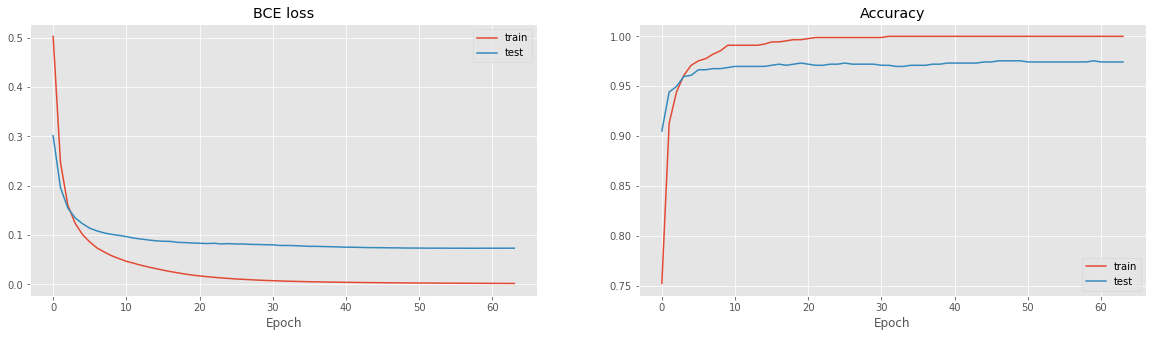

In [27]:
# construct network
net = Net([
        Linear(64, 32),
        ReLU(),
        Linear(32, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 64,
    learning_rate = 0.01,
    mb_size = 32)


**Which of the hyperparameters (number of epochs, learning rate, minibatch size) was most important? How did they influence your results?**

TODO: Your answer here.

The learning rate is the most effective hyperparameter. If we considerably reduce or raise the number of epochs or mini_batch_size, we can't see significant changes in the accuracy. While changing the learning rate even can lead to going out of the training process (for example for a rate greater than 0.02)

**Repeat the experiment with a the same network, but remove the ReLU activation in the middle: `[Linear, Linear, Sigmoid]`.**

Epoch   0: loss[train]= 0.6652  accuracy[train]= 0.7254  loss[test]= 0.3632  accuracy[test]= 0.8549
Epoch   1: loss[train]= 0.3493  accuracy[train]= 0.8616  loss[test]= 0.3222  accuracy[test]= 0.8683
Epoch   2: loss[train]= 0.3120  accuracy[train]= 0.8761  loss[test]= 0.3167  accuracy[test]= 0.8650
Epoch   3: loss[train]= 0.2943  accuracy[train]= 0.8850  loss[test]= 0.3196  accuracy[test]= 0.8560
Epoch   4: loss[train]= 0.2839  accuracy[train]= 0.8906  loss[test]= 0.3261  accuracy[test]= 0.8560
Epoch   5: loss[train]= 0.2772  accuracy[train]= 0.8917  loss[test]= 0.3326  accuracy[test]= 0.8560
Epoch   6: loss[train]= 0.2725  accuracy[train]= 0.8962  loss[test]= 0.3370  accuracy[test]= 0.8527
Epoch   7: loss[train]= 0.2691  accuracy[train]= 0.9007  loss[test]= 0.3391  accuracy[test]= 0.8538
Epoch   8: loss[train]= 0.2664  accuracy[train]= 0.9007  loss[test]= 0.3392  accuracy[test]= 0.8549
Epoch   9: loss[train]= 0.2643  accuracy[train]= 0.8996  loss[test]= 0.3381  accuracy[test]= 0.8571


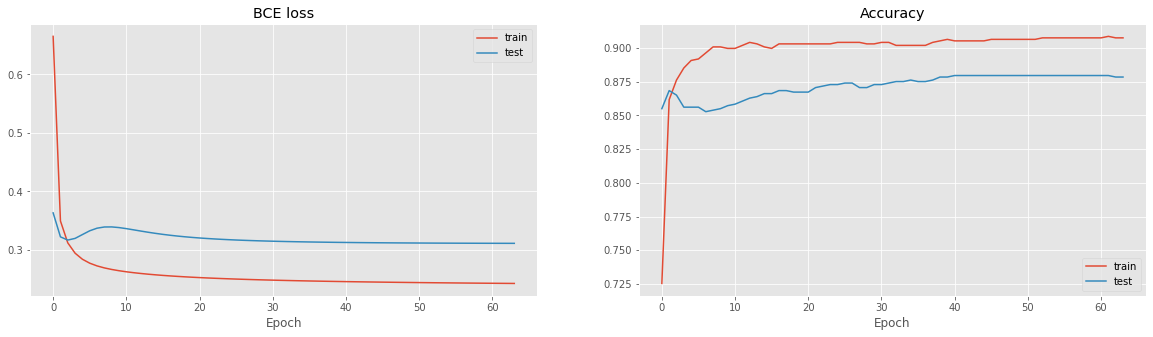

In [28]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 32),
        Linear(32, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 64,
    learning_rate = 0.01,
    mb_size = 32)

**How does the performance of this network compare with the previous network. Can you explain this result? How does removing the ReLU affect the model?**

TODO: Your answer here.

The gap between training and test accuracy got higher. Besides, the absolute value of loss has increased (the model cannot learn as well as it has ReLU). So we can understand the importance of nonlinear functions in the training process.

**Create a network with one linear layer followed by a sigmoid activation:**

`net = Net([Linear(...), Sigmoid()]`

**Train this network. Compare the results with the `[Linear, ReLU, Linear, Sigmoid]` and `[Linear, Linear, Sigmoid]` networks you trained before, and explain the results.**

Epoch   0: loss[train]= 0.6096  accuracy[train]= 0.6908  loss[test]= 0.5096  accuracy[test]= 0.7991
Epoch   1: loss[train]= 0.4320  accuracy[train]= 0.8516  loss[test]= 0.4024  accuracy[test]= 0.8438
Epoch   2: loss[train]= 0.3558  accuracy[train]= 0.8750  loss[test]= 0.3567  accuracy[test]= 0.8560
Epoch   3: loss[train]= 0.3213  accuracy[train]= 0.8817  loss[test]= 0.3345  accuracy[test]= 0.8616
Epoch   4: loss[train]= 0.3021  accuracy[train]= 0.8828  loss[test]= 0.3220  accuracy[test]= 0.8616
Epoch   5: loss[train]= 0.2896  accuracy[train]= 0.8850  loss[test]= 0.3142  accuracy[test]= 0.8683
Epoch   6: loss[train]= 0.2805  accuracy[train]= 0.8906  loss[test]= 0.3092  accuracy[test]= 0.8694
Epoch   7: loss[train]= 0.2737  accuracy[train]= 0.8917  loss[test]= 0.3060  accuracy[test]= 0.8728
Epoch   8: loss[train]= 0.2683  accuracy[train]= 0.8940  loss[test]= 0.3040  accuracy[test]= 0.8739
Epoch   9: loss[train]= 0.2639  accuracy[train]= 0.9007  loss[test]= 0.3025  accuracy[test]= 0.8717


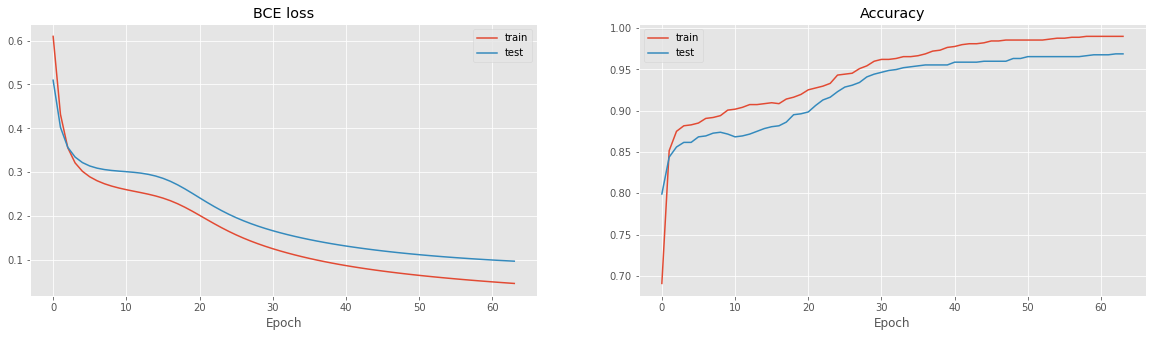

In [29]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 32),
        Sigmoid(),
        Linear(32, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 64,
    learning_rate = 0.01,
    mb_size = 32)

**Discuss your results.**

TODO: Discuss the results here.

This model is better than the model without any nonlinear function layer. However, the model with ReLU activation layer works a bit better. The absolute value of accuracy in the ReLU model was above .98 but in this case is just above .96. Also, it has gotten more epochs that the model could learn (comparing the learning trend shown in diagrams)

**Try a deeper network (e.g., four linear layers) to see if this can improve the results further.**

Epoch   0: loss[train]= 0.6793  accuracy[train]= 0.5859  loss[test]= 0.6349  accuracy[test]= 0.7188
Epoch   1: loss[train]= 0.5513  accuracy[train]= 0.7757  loss[test]= 0.4118  accuracy[test]= 0.8438
Epoch   2: loss[train]= 0.3500  accuracy[train]= 0.8806  loss[test]= 0.2278  accuracy[test]= 0.9196
Epoch   3: loss[train]= 0.1855  accuracy[train]= 0.9319  loss[test]= 0.1314  accuracy[test]= 0.9498
Epoch   4: loss[train]= 0.1067  accuracy[train]= 0.9554  loss[test]= 0.1047  accuracy[test]= 0.9576
Epoch   5: loss[train]= 0.1120  accuracy[train]= 0.9531  loss[test]= 0.1185  accuracy[test]= 0.9587
Epoch   6: loss[train]= 0.0729  accuracy[train]= 0.9788  loss[test]= 0.1005  accuracy[test]= 0.9565
Epoch   7: loss[train]= 0.0416  accuracy[train]= 0.9877  loss[test]= 0.0766  accuracy[test]= 0.9732
Epoch   8: loss[train]= 0.0298  accuracy[train]= 0.9900  loss[test]= 0.0706  accuracy[test]= 0.9732
Epoch   9: loss[train]= 0.0666  accuracy[train]= 0.9788  loss[test]= 0.0830  accuracy[test]= 0.9699


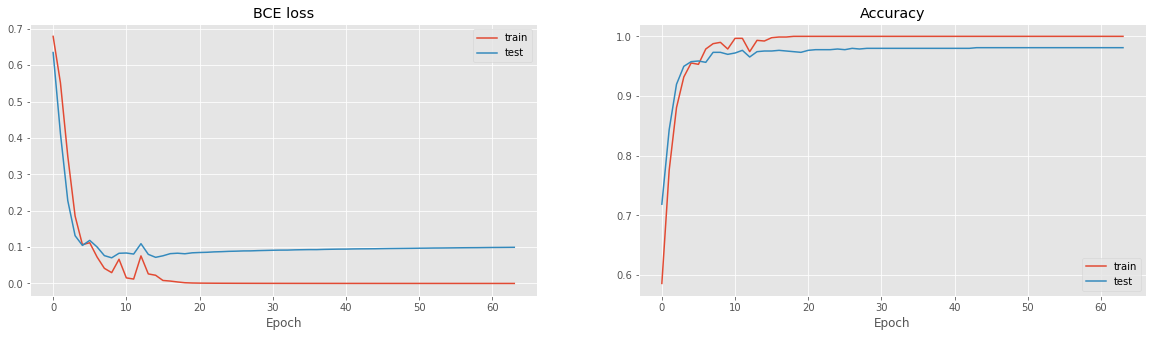

In [30]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 32),
        ReLU(),
        Linear(32, 16),
        ReLU(),
        Linear(16, 8),
        ReLU(),
        Linear(8, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 64,
    learning_rate = 0.01,
    mb_size = 32)

**Discuss your findings. Were you able to obtain a perfect classification? Explain the learning curves.**

TODO: Your answer here.

By increasing the number of linear layers without any nonlinear activation function, the model's performance does not change significantly because linear layers just directly transmit weights in backpropagation. Besides, increasing the number of layers raises the number of weights that need to learn from data that is not necessarily helpful. By adding nonlinear layers (ReLU) between each linear layer, we could access acceptable accuracy, though.

## 1.7 Final questions

You now have some experience training neural networks. Time for a few final questions.

**What is the influence of the learning rate? What happens if the learning rate is too low or too high?**

TODO: Your answer here.

The LR determines how quickly a model can learn from data to find the optimal point. By choosing smaller LR, more epochs are needed to find the minimum. While too small LR, may not find any optimal point. On the other hand, a large LR may make the model converge to a suboptimal point, and too large LR would lead to overshooting.

**What is the role of the minibatch size in SGD? Explain the downsides of a minibatch size that is too small or too high.**

TODO: Your answer here.

Due to the processing issue, we cannot feed the model by the whole amount of data. So, we should send data batch by batch. As the model learns from the batches, it is better to provide more data per batch. It means the more data can train the model better. But sending a lot of data also can lead to overfitting and makes the model slower. However, the model cannot learn well enough from the small amount of data in each batch.

**In the linear layer, we initialized the weights $w$ with random weights, but we initialized the bias $b$ with zeros. What would happen if the weights $w$ were initialised as zeros? Why is this not a problem for the bias?**

TODO: Your answer here.

The initialized weights with zero would lead to have a model like linear layers. Because they would multiply to derivatives in backpropagation and make them zero again. So, the model learns the same features during the whole training phase. However, this problem does not happen for zero bias because it is compensated by weights asymmetric breaking. 

## The end

Well done! Please double check the instructions at the top before you submit your results.